In [1]:
import neuralnet as nn
import matplotlib.pyplot as plt
import numpy as np
import pickle
import time
np.random.seed(123)

In [2]:
# Load training data
class Data(nn.DataSource):
    def __init__(self):
        super().__init__()
        self.TRAIN_IN, self.TRAIN_OUT = pickle.load(open('data/mnist_preprocessed.pickle', 'rb'))
    
    def size(self):
        return len(self.TRAIN_IN)
    
    def sample(self, i):
        return (self.TRAIN_IN[i], self.TRAIN_IN[i])

data = Data()

In [3]:
N = 10
a = 0.0001
AdamArgs = (0.9, 0.999)

In [4]:
model = nn.AutoEncoder(784, 50, *AdamArgs)
trainer = nn.Trainer(model, data)

Training of coupled autoencoder complete in 0.5880090951919555 seconds per epoch.


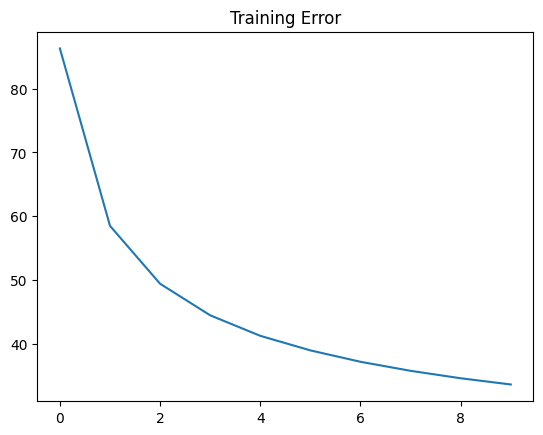

In [ ]:
ts = time.time()
errors = trainer.train(N, a)
duration = time.time() - ts
print(f"Training of autoencoder complete in {duration / N} seconds per epoch.")

plt.title("Training Error")
plt.plot(range(len(errors)), errors)
plt.show()